In [3]:
mkdir ml_project
cd ml_project
git init


SyntaxError: invalid syntax (1138669756.py, line 1)

In [7]:
# Install virtualenv if not already installed
!pip install virtualenv

# Create virtual environment
virtualenv venv

# Activate the virtual environment
# For Windows:
venv\Scripts\activate

# For Mac/Linux:
source venv/bin/activate


SyntaxError: invalid syntax (3483922641.py, line 5)

In [9]:
import os

# Define project structure
folders = [
    'src', 
    'src/components', 
    'src/pipeline', 
    'notebook'
]

files = {
    'src/__init__.py': '',
    'src/logger.py': '',
    'src/exception.py': '',
    'src/utils.py': '',
    'src/components/__init__.py': '',
    'src/components/data_ingestion.py': '',
    'src/components/data_transformation.py': '',
    'src/components/model_trainer.py': '',
    'src/pipeline/__init__.py': '',
    'src/pipeline/predict_pipeline.py': '',
    'src/pipeline/train_pipeline.py': '',
    'import_data.py': '',
    'setup.py': '',
    'requirements.txt': '',
    'README.md': '',
    '.gitignore': ''
}

# Create folders
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# Create files
for file, content in files.items():
    with open(file, 'w') as f:
        f.write(content)

print("Project structure created successfully.")


Project structure created successfully.


In [11]:
from setuptools import find_packages, setup

setup(
    name='ml_project',
    version='0.1',
    author='Your Name',
    author_email='your.email@example.com',
    packages=find_packages(),
    install_requires=[
        'pandas',
        'numpy',
        'scikit-learn',
        'flask',
        'pymongo',
        'matplotlib',
        'seaborn',
    ]
)


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [27]:
import pandas as pd
import numpy as np
import scikit-learn
import flask
import pymongo
import matplotlib as plt
import seaborn as sns


SyntaxError: invalid syntax (1118288761.py, line 3)

In [17]:
!pip install -r requirements.txt


In [19]:
import logging
import os
from datetime import datetime

# Set up logging
LOG_FILE = f"logs/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.log"
os.makedirs(os.path.dirname(LOG_FILE), exist_ok=True)

logging.basicConfig(
    filename=LOG_FILE,
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

def get_logger():
    return logging.getLogger()


In [21]:
import sys

class CustomException(Exception):
    def __init__(self, message, error):
        super().__init__(message)
        self.error = error

    def __str__(self):
        return f"Error occurred: {self.message}, Details: {self.error}"

def log_exception(e: Exception):
    _, _, exc_tb = sys.exc_info()
    file_name = exc_tb.tb_frame.f_code.co_filename
    line_number = exc_tb.tb_lineno
    return f"Error in script {file_name} at line {line_number}: {str(e)}"


In [23]:
import pymongo
from sklearn.datasets import load_breast_cancer
import pandas as pd
from logger import get_logger

logger = get_logger()

def load_data_to_mongodb():
    logger.info("Loading breast cancer dataset.")
    data = load_breast_cancer(as_frame=True)
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target

    # MongoDB connection
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["breast_cancer_db"]
    collection = db["breast_cancer_data"]

    logger.info("Inserting dataset into MongoDB.")
    collection.insert_many(df.to_dict('records'))
    logger.info("Data successfully loaded into MongoDB.")

if __name__ == "__main__":
    load_data_to_mongodb()


ModuleNotFoundError: No module named 'logger'

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from logger import get_logger

logger = get_logger()

def feature_engineering(df):
    logger.info("Performing feature engineering.")
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df.drop('target', axis=1))
    
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])
    scaled_df['target'] = df['target'].values
    logger.info("Feature engineering completed.")
    
    return scaled_df


ModuleNotFoundError: No module named 'logger'

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from logger import get_logger

logger = get_logger()

def train_model(df):
    logger.info("Splitting data into train and test sets.")
    X = df.drop('target', axis=1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    logger.info("Training RandomForest model.")
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    logger.info("Evaluating model.")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    logger.info(f"Model accuracy: {accuracy}")
    
    return model, accuracy


ModuleNotFoundError: No module named 'logger'

In [33]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Preprocess data and make prediction (load model from file)
    # Return prediction results
    return jsonify({"prediction": "result"})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


matplotlib data path: C:\Users\PC\anaconda3\Lib\site-packages\matplotlib\mpl-data
CONFIGDIR=C:\Users\PC\.matplotlib
interactive is False
platform is win32
CACHEDIR=C:\Users\PC\.matplotlib
Using fontManager instance from C:\Users\PC\.matplotlib\fontlist-v330.json
Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='C:\\Users\\PC\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='C:\\Users\\PC\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
fin

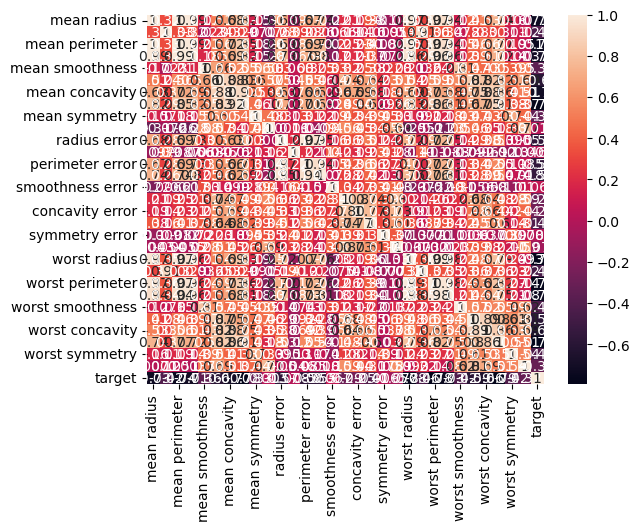

In [35]:
# exploratory_analysis.ipynb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer(as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Basic stats
df.describe()

# Missing values check
df.isnull().sum()

# Visualizations
sns.heatmap(df.corr(), annot=True)
plt.show()

# Other visualizations, histograms, pairplots, etc.


In [37]:
import pymongo
from sklearn.datasets import load_breast_cancer
import pandas as pd

def load_data_to_mongodb():
    # MongoDB connection
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["breast_cancer_db"]
    collection = db["breast_cancer_data"]
    
    # Load dataset
    data = load_breast_cancer(as_frame=True)
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    
    # Insert into MongoDB
    collection.insert_many(df.to_dict('records'))
    
    print("Data successfully loaded into MongoDB.")

if __name__ == "__main__":
    load_data_to_mongodb()


{"topologyId": {"$oid": "66fbd86a5ecef2dc70e50e77"}, "message": "Starting topology monitoring"}
{"topologyId": {"$oid": "66fbd86a5ecef2dc70e50e77"}, "previousDescription": "<TopologyDescription id: 66fbd86a5ecef2dc70e50e77, topology_type: Unknown, servers: []>", "newDescription": "<TopologyDescription id: 66fbd86a5ecef2dc70e50e77, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None>]>", "message": "Topology description changed"}
{"topologyId": {"$oid": "66fbd86a5ecef2dc70e50e77"}, "serverHost": "localhost", "serverPort": 27017, "message": "Starting server monitoring"}
{"clientId": {"$oid": "66fbd86a5ecef2dc70e50e77"}, "message": "Connection pool created", "serverHost": "localhost", "serverPort": 27017}
{"message": "Server selection started", "selector": "<function writable_server_selector at 0x00000200070879C0>", "operation": "insert", "operationId": 792415482, "topologyDescription": "<TopologyDescription id: 66fbd86a5ecef2dc70e50e7

ServerSelectionTimeoutError: localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 66fbd86a5ecef2dc70e50e77, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>

{"topologyId": {"$oid": "66fbd86a5ecef2dc70e50e77"}, "serverHost": "localhost", "serverPort": 27017, "awaited": false, "durationMS": 2045.9999999729916, "failure": "\"AutoReconnect('localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')\"", "message": "Server heartbeat failed"}
{"topologyId": {"$oid": "66fbd86a5ecef2dc70e50e77"}, "previousDescription": "<TopologyDescription id: 66fbd86a5ecef2dc70e50e77, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>", "newDescription": "<TopologyDescription id: 66fbd86a5ecef2dc70e50e77, topology_type: Unknown, servers: [<ServerDescription ('localhost'

In [39]:
import pymongo
import pandas as pd

def load_data_from_mongodb():
    # MongoDB connection
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    db = client["breast_cancer_db"]
    collection = db["breast_cancer_data"]
    
    # Fetch data from MongoDB
    data = list(collection.find({}, {"_id": 0}))
    df = pd.DataFrame(data)
    
    print("Data successfully loaded from MongoDB.")
    return df

if __name__ == "__main__":
    df = load_data_from_mongodb()
    print(df.head())


{"topologyId": {"$oid": "66fbd8945ecef2dc70e510b1"}, "message": "Starting topology monitoring"}
{"topologyId": {"$oid": "66fbd8945ecef2dc70e510b1"}, "previousDescription": "<TopologyDescription id: 66fbd8945ecef2dc70e510b1, topology_type: Unknown, servers: []>", "newDescription": "<TopologyDescription id: 66fbd8945ecef2dc70e510b1, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None>]>", "message": "Topology description changed"}
{"topologyId": {"$oid": "66fbd8945ecef2dc70e510b1"}, "serverHost": "localhost", "serverPort": 27017, "message": "Starting server monitoring"}
{"clientId": {"$oid": "66fbd8945ecef2dc70e510b1"}, "message": "Connection pool created", "serverHost": "localhost", "serverPort": 27017}
{"message": "Server selection started", "selector": "Primary()", "operation": "find", "topologyDescription": "<TopologyDescription id: 66fbd8945ecef2dc70e510b1, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017)

ServerSelectionTimeoutError: localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 66fbd8945ecef2dc70e510b1, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>

{"topologyId": {"$oid": "66fbd8945ecef2dc70e510b1"}, "serverHost": "localhost", "serverPort": 27017, "awaited": false, "durationMS": 2047.000000020489, "failure": "\"AutoReconnect('localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')\"", "message": "Server heartbeat failed"}
{"topologyId": {"$oid": "66fbd8945ecef2dc70e510b1"}, "previousDescription": "<TopologyDescription id: 66fbd8945ecef2dc70e510b1, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [WinError 10061] No connection could be made because the target machine actively refused it (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>", "newDescription": "<TopologyDescription id: 66fbd8945ecef2dc70e510b1, topology_type: Unknown, servers: [<ServerDescription ('localhost',

In [42]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def feature_engineering(df):
    # Remove any irrelevant features if necessary
    # df = df.drop(columns=['unnecessary_column'])
    
    # Feature scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df.drop('target', axis=1))
    
    # Creating a new DataFrame
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])
    scaled_df['target'] = df['target'].values
    
    print("Feature engineering complete.")
    return scaled_df

if __name__ == "__main__":
    # Load data from MongoDB
    from data_ingestion import load_data_from_mongodb
    df = load_data_from_mongodb()
    
    # Apply feature engineering
    df_transformed = feature_engineering(df)
    print(df_transformed.head())


ModuleNotFoundError: No module named 'data_ingestion'